In [565]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [566]:
df_test=pd.read_csv("C:\\Users\\KIIT\\Desktop\\Datasets\\Participants_Data_HPP\\Test.csv")
df_train=pd.read_csv("C:\\Users\\KIIT\\Desktop\\Datasets\\Participants_Data_HPP\\Train.csv")

In [567]:
df_test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [568]:
df_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [569]:
df=pd.concat([df_test,df_train["TARGET(PRICE_IN_LACS)"]],axis=1)

In [570]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,55.0
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,51.0
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,43.0
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,62.5
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,60.5


In [571]:
df.isnull().sum()

POSTED_BY                    0
UNDER_CONSTRUCTION           0
RERA                         0
BHK_NO.                      0
BHK_OR_RK                    0
SQUARE_FT                    0
READY_TO_MOVE                0
RESALE                       0
ADDRESS                      0
LONGITUDE                    0
LATITUDE                     0
TARGET(PRICE_IN_LACS)    39269
dtype: int64

In [572]:
for column in df.columns:
    print(df[column].value_counts())
    print("-"*30)

Dealer     42437
Owner      24920
Builder     1363
Name: POSTED_BY, dtype: int64
------------------------------
0    56587
1    12133
Name: UNDER_CONSTRUCTION, dtype: int64
------------------------------
0    46968
1    21752
Name: RERA, dtype: int64
------------------------------
2     30998
3     24756
1      8383
4      4001
5       394
6       106
7        17
8        15
9        13
12       13
10        8
20        6
11        4
13        3
18        1
16        1
31        1
Name: BHK_NO., dtype: int64
------------------------------
BHK    68662
RK        58
Name: BHK_OR_RK, dtype: int64
------------------------------
1000.000000    1111
1250.000000     688
800.000000      441
1200.000000     433
1600.000000     282
               ... 
1344.680851       1
1671.681712       1
719.036491        1
1364.049712       1
1173.708920       1
Name: SQUARE_FT, Length: 37704, dtype: int64
------------------------------
1    56587
0    12133
Name: READY_TO_MOVE, dtype: int64
----------------

In [573]:
df.shape

(68720, 12)

<AxesSubplot:>

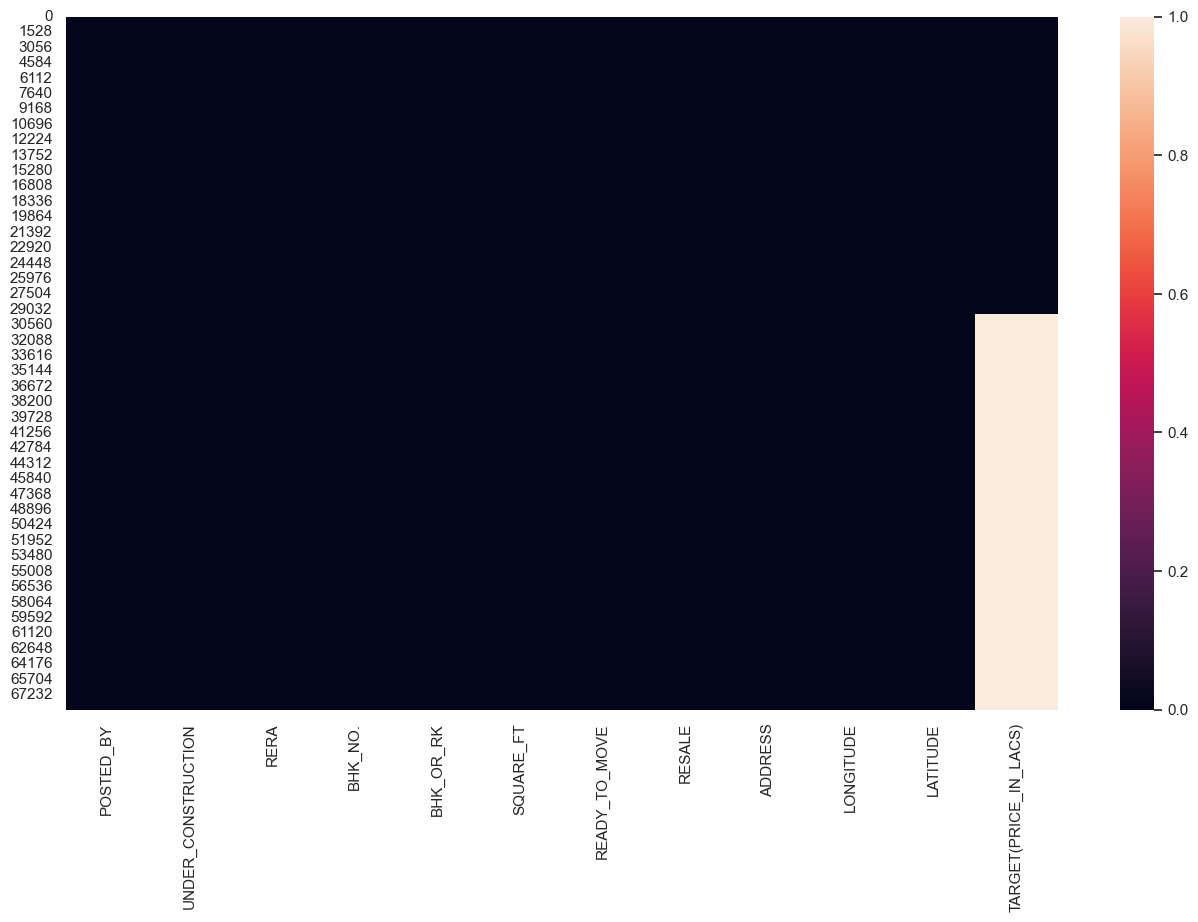

In [574]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())  #white marked part has NULL values, we have to fill it.

In [575]:
df.isnull().sum()/df.shape[0]*100  #TARGET column has around 57% of NULL values ( > 20% )
#so we can't directly remove them, we have to impute them

POSTED_BY                 0.000000
UNDER_CONSTRUCTION        0.000000
RERA                      0.000000
BHK_NO.                   0.000000
BHK_OR_RK                 0.000000
SQUARE_FT                 0.000000
READY_TO_MOVE             0.000000
RESALE                    0.000000
ADDRESS                   0.000000
LONGITUDE                 0.000000
LATITUDE                  0.000000
TARGET(PRICE_IN_LACS)    57.143481
dtype: float64

In [576]:
miss=[var for var in df.columns if df[var].isnull().sum()>0]
miss

['TARGET(PRICE_IN_LACS)']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


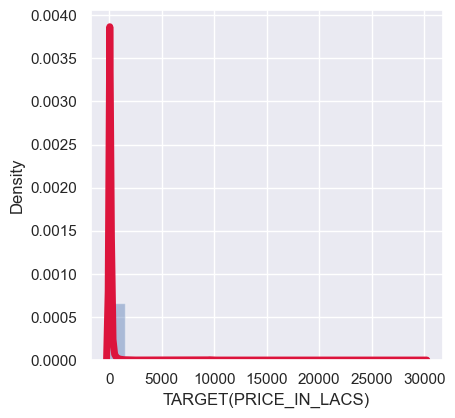

In [577]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(miss):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var],bins=20,kde_kws={'linewidth':5,'color':'#DC143C'})
    
#here we didn't get the valuable insights from graph, so we can't impute using central tendencies

In [578]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,68720.000000,68720.000000,68720.000000,6.872000e+04,68720.000000,68720.000000,68720.000000,68720.000000,29451.000000
mean,0.176557,0.316531,2.388198,2.762419e+03,0.823443,0.933498,21.288045,76.919388,142.898746
std,0.381296,0.465126,0.864577,1.640991e+05,0.381296,0.249159,6.179034,10.100950,656.880713
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-118.354100,0.250000
25%,0.000000,0.000000,2.000000,9.000310e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.174982e+03,1.000000,1.000000,20.933260,77.324966,62.000000
75%,0.000000,1.000000,3.000000,1.550265e+03,1.000000,1.000000,26.888396,78.000723,100.000000
max,1.000000,1.000000,31.000000,4.016393e+07,1.000000,1.000000,65.183330,175.278040,30000.000000


In [579]:
df["POSTED_BY"].value_counts()

Dealer     42437
Owner      24920
Builder     1363
Name: POSTED_BY, dtype: int64

In [580]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,55.0
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,51.0
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,43.0
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,62.5
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330,NaN
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082,NaN
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231,NaN
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670,NaN


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


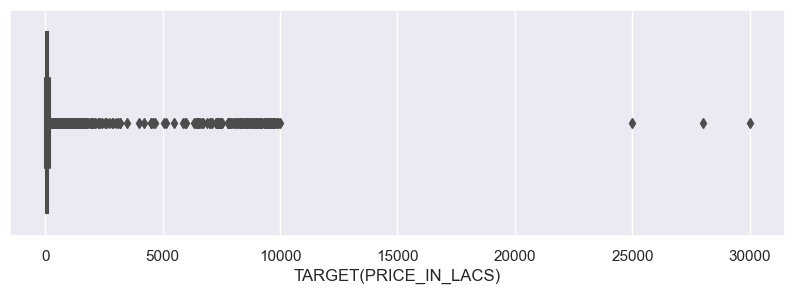

In [581]:
for i, var in enumerate(miss):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(df[var])
    
    #to check if there is Outlier present in Dataset

In [582]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,55.0
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,51.0
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,43.0
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,62.5
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,60.5


In [583]:
df['BHK_NO.'].value_counts()

2     30998
3     24756
1      8383
4      4001
5       394
6       106
7        17
8        15
9        13
12       13
10        8
20        6
11        4
13        3
18        1
16        1
31        1
Name: BHK_NO., dtype: int64

In [584]:
df['BHK_NO.'].unique()

array([ 1,  2,  3,  4, 10,  5,  6, 18, 20, 12,  7,  9,  8, 16, 13, 11, 31],
      dtype=int64)

In [585]:
print(df[df.loc[:,'BHK_NO.']==1]["TARGET(PRICE_IN_LACS)"].mean())
print(df[df.loc[:,'BHK_NO.']==2]["TARGET(PRICE_IN_LACS)"].mean())
print(df[df.loc[:,'BHK_NO.']==3]["TARGET(PRICE_IN_LACS)"].mean())
print(df[df.loc[:,'BHK_NO.']==4]["TARGET(PRICE_IN_LACS)"].mean())
print(df[df.loc[:,'BHK_NO.']==5]["TARGET(PRICE_IN_LACS)"].mean())
print(df[df.loc[:,'BHK_NO.']==6]["TARGET(PRICE_IN_LACS)"].mean())
print(df[df.loc[:,'BHK_NO.']>6]["TARGET(PRICE_IN_LACS)"].mean())

142.73144119271154
143.902305153401
143.46028281294423
135.195058411215
128.6196932515338
105.62291666666665
106.47894736842103


In [586]:
df.sample(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
19788,Dealer,0,0,2,BHK,1159.970473,1,1,"Kharghar,Mumbai",19.038205,73.066120,13.0
66594,Dealer,1,0,2,BHK,994.097546,0,1,"Jawahar Nagar,Lalitpur",28.679892,77.206160,NaN
24131,Dealer,1,0,2,BHK,829.973915,0,1,"Kattupakkam,Chennai",13.042089,80.124264,55.4
7353,Dealer,0,0,3,BHK,1690.196858,1,1,"Sector 15 Kharghar,Maharashtra",19.040416,73.078151,28.0
50260,Owner,0,0,3,BHK,1632.319935,1,1,"Amruthahalli,Bangalore",13.063752,77.605027,NaN
54303,Owner,0,0,2,BHK,956.022945,1,1,"Kanadia Road,Indore",22.727810,75.963175,NaN
51104,Owner,0,0,1,BHK,560.028001,1,1,"Sus,Pune",18.539812,73.737678,NaN
28923,Dealer,0,1,4,BHK,2189.012240,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,68.0
16415,Owner,0,0,2,BHK,1197.843881,1,1,"Hegganahalli,Bangalore",13.001429,77.511239,24.4
48106,Dealer,0,1,2,BHK,1079.855299,1,1,"kurla (west),Lalitpur",19.071300,72.883000,NaN


In [587]:
print(df[df.loc[:,'POSTED_BY']=="Dealer"]["TARGET(PRICE_IN_LACS)"].mean())
print(df[df.loc[:,'POSTED_BY']=="Owner"]["TARGET(PRICE_IN_LACS)"].mean())
print(df[df.loc[:,'POSTED_BY']=="Builder"]["TARGET(PRICE_IN_LACS)"].mean())

148.31708335628795
133.6806358974354
143.79610434782603


In [588]:
print(df[df.loc[:,'UNDER_CONSTRUCTION']==1]["TARGET(PRICE_IN_LACS)"].mean())
print(df[df.loc[:,'UNDER_CONSTRUCTION']==0]["TARGET(PRICE_IN_LACS)"].mean())

134.58003274898905
144.67873083264533


In [589]:
print(df[df.loc[:,'RERA']==1]["TARGET(PRICE_IN_LACS)"].mean())
print(df[df.loc[:,'RERA']==0]["TARGET(PRICE_IN_LACS)"].mean())

149.8822019334046
139.67070453304106


In [590]:
df['BHK_OR_RK'].value_counts()

BHK    68662
RK        58
Name: BHK_OR_RK, dtype: int64

In [591]:
df[df['BHK_OR_RK']=="RK"].isnull().sum()

POSTED_BY                 0
UNDER_CONSTRUCTION        0
RERA                      0
BHK_NO.                   0
BHK_OR_RK                 0
SQUARE_FT                 0
READY_TO_MOVE             0
RESALE                    0
ADDRESS                   0
LONGITUDE                 0
LATITUDE                  0
TARGET(PRICE_IN_LACS)    33
dtype: int64

In [592]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,55.0
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,51.0
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,43.0
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,62.5
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330,NaN
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082,NaN
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231,NaN
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670,NaN


In [593]:
df=df.drop(columns=["LONGITUDE","LATITUDE"])

In [594]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS)
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",55.0
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",51.0
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",43.0
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",62.5
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",60.5


In [595]:
df.shape

(68720, 10)

In [596]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
count,68720.000000,68720.000000,68720.000000,6.872000e+04,68720.000000,68720.000000,29451.000000
mean,0.176557,0.316531,2.388198,2.762419e+03,0.823443,0.933498,142.898746
std,0.381296,0.465126,0.864577,1.640991e+05,0.381296,0.249159,656.880713
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.250000
25%,0.000000,0.000000,2.000000,9.000310e+02,1.000000,1.000000,38.000000
50%,0.000000,0.000000,2.000000,1.174982e+03,1.000000,1.000000,62.000000
75%,0.000000,1.000000,3.000000,1.550265e+03,1.000000,1.000000,100.000000
max,1.000000,1.000000,31.000000,4.016393e+07,1.000000,1.000000,30000.000000


In [597]:
df.head(2)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS)
0,Owner,0,0,1,BHK,545.17134,1,1,"Kamrej,Surat",55.0
1,Dealer,1,1,2,BHK,800.00000,0,0,"Panvel,Lalitpur",51.0


In [598]:
df['BHK TEMP']=df["BHK_OR_RK"].str[0]  #fetching BHK and RK rows

In [599]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),BHK TEMP
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",55.0,B
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",51.0,B
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",43.0,B
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",62.5,B
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",60.5,B


In [600]:
df['BHK TEMP'].value_counts()

B    68662
R       58
Name: BHK TEMP, dtype: int64

In [601]:
df[df['BHK_NO.']>20]  # >20 bhk is an outlier, which needed to be fixed

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),BHK TEMP
30120,Dealer,0,0,31,BHK,18450.1845,1,1,"Chakala,Lalitpur",NaN,B


In [602]:
df['Price per sq_ft']=df['TARGET(PRICE_IN_LACS)']*100000/df['SQUARE_FT'] #calculating price per sq_ft in Rupees

In [603]:
df.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),BHK TEMP,Price per sq_ft
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",55.0,B,10088.571428
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",51.0,B,6375.000000
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",43.0,B,3420.580644
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",62.5,B,4463.235295
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",60.5,B,14054.150000


In [604]:
df[df['BHK TEMP']=='R'].isnull().sum()

POSTED_BY                 0
UNDER_CONSTRUCTION        0
RERA                      0
BHK_NO.                   0
BHK_OR_RK                 0
SQUARE_FT                 0
READY_TO_MOVE             0
RESALE                    0
ADDRESS                   0
TARGET(PRICE_IN_LACS)    33
BHK TEMP                  0
Price per sq_ft          33
dtype: int64

In [605]:
df[(df['BHK TEMP']=='R') & (df['TARGET(PRICE_IN_LACS)'].isnull())].shape

(33, 12)

In [606]:
df[df['BHK TEMP'] == 'R'].shape

(58, 12)

In [607]:
df = df[df['BHK TEMP'] == 'R'].dropna(subset=['TARGET(PRICE_IN_LACS)'])

In [608]:
df.shape

(25, 12)